# Tasks

In [3]:
# Data frames.
import pandas as pd

# Machine Learning Library that contains example datasets.
import sklearn as skl

# Datasets.
import numpy as np

# Plotting.
%pip install matplotlib
import matplotlib.pyplot as plt

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 6.7 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 7.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 7.4 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 7.3 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------- -------------------- 1.3/2.6 MB 6.7 MB/s eta 

### Task 1: Source the Data Set

Import the Iris data set from the ``sklearn.datasets`` module.

Explain, in your own words, what the ``load_iris()`` function returns.

In [4]:
# Load the iris dataset.
df = pd.read_csv("https://gist.github.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [5]:
# Have a look.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
# Calculate the sum of the numbers from 1 to 10 inclusive.
sum = 0
for i in range(1, 11):
    sum += i
    print(sum)


1
3
6
10
15
21
28
36
45
55


### Task 2: Explore the Data Structure
 Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

In [7]:
# Describe the data set.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# look at the data.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
# Look at the keys
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
# The species of iris
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [11]:
# Shape
df['species'].shape

(150,)

In [12]:
# The sepal length
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [13]:
# The petal lenght
df['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [14]:
# the petal width
df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

### Task 3: Summarize the Data
For each feature in the dataset, calculate and display:

- mean

- minimum

- maximum

- standard deviation

- median

In [15]:
# Statistics
stats = df.describe().T[['mean', 'min', 'max', 'std']]
stats['median'] = df.median(numeric_only=True) # select only the numeric columns

# Print results
print(stats)


                  mean  min  max       std  median
sepal_length  5.843333  4.3  7.9  0.828066    5.80
sepal_width   3.054000  2.0  4.4  0.433594    3.00
petal_length  3.758667  1.0  6.9  1.764420    4.35
petal_width   1.198667  0.1  2.5  0.763161    1.30


### Task 4: Visualize Features
Plot histograms for each feature using *matplotlib*.
Add appropriate titles and axis labels.

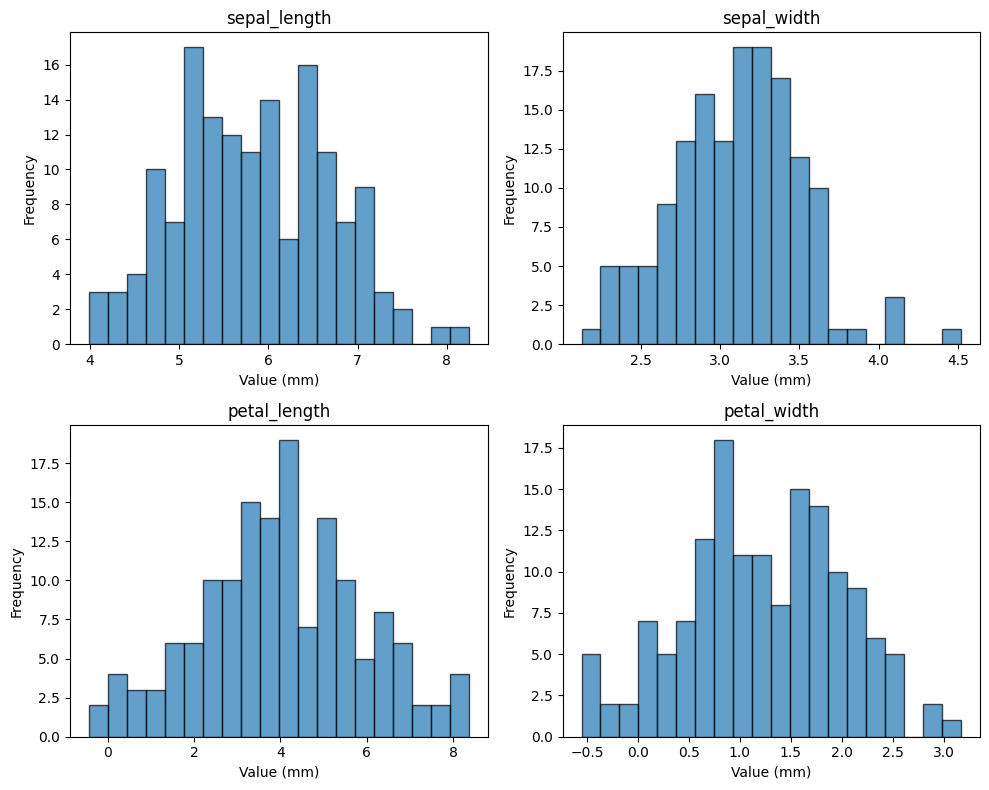

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Given summary statistics
data = {
    "sepal_length": np.random.normal(5.843333, 0.828066, 150),
    "sepal_width": np.random.normal(3.054000, 0.433594, 150),
    "petal_length": np.random.normal(3.758667, 1.764420, 150),
    "petal_width": np.random.normal(1.198667, 0.763161, 150)
}

# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for idx, (feature, values) in enumerate(data.items()):
    axes[idx].hist(values, bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(feature)
    axes[idx].set_xlabel("Value (mm)")
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



### Task 5: Investigate Relationships
Choose any two features from the data set and create a scatter plot of them.

Color-code the three different classes of the scatter plot points.

### Task 6: Analyze Relationship
Use ``numpy.polyfit`` to add a regression line to the scatter plot from Task 5.

### Task 7: Analyze Class Distributions
Create box-plots of the petal lengths for each of the three classes.

### Task 8: Compute Correlations
Calculate the correlation coefficients between the features.

Display the results as a heatmap using *matplotlib*.

### Task 9: Fit a Simple Linear Regression
For your two features in Task 5, calculate the coefficient of determination 
R<sup>
2</sup>
.

Re-create the plot from Task 6 and annotate it with the 
R<sup>
2</sup>
 value.

### Task 10: Too Many Features
Use seaborn to create a pairplot of the data set.

Explain, in your own words, what the pairplot depicts.

## End